# Import requirements

In [1]:
from __future__ import division
import glob
import pandas as pd
import numpy as np
import itertools
from collections import Counter
import time
import matplotlib.pyplot as plt
%matplotlib inline

# Import dataframe

In [2]:
DF = pd.read_csv('/Users/greg/Desktop/FullNeuroIllumina/complete_data.csv')
DF.head()

,Patient,Visit,GDS,Prot,AAPos,Coverage,A,R,N,D,...,L,K,M,F,P,S,T,W,Y,V
0,A0001,R09,0.583333,Tat1,1,38938,0.000051,0.002157,0.000051,0.000077,...,0.006934,0.001695,0.565052,0.000026,0,0.000848,0.000128,0.416637,0,0.000205
1,A0010,R08,1.416667,Tat1,1,171,0.000000,0.000000,0.000000,0.000000,...,0.005848,0.005848,0.584795,0.000000,0,0.000000,0.000000,0.403509,0,0.000000
2,A0013,R09,0.000000,Tat1,1,602,0.000000,0.001661,0.000000,0.000000,...,0.001661,0.004983,0.282392,0.000000,0,0.001661,0.000000,0.209302,0,0.000000
3,A0019,R12,0.250000,Tat1,1,1485,0.000000,0.001347,0.000673,0.000000,...,0.008081,0.003367,0.526599,0.000000,0,0.001347,0.000673,0.452525,0,0.000000
4,A0026,R09,0.583333,Tat1,1,334,0.000000,0.002994,0.000000,0.000000,...,0.008982,0.000000,0.589820,0.000000,0,0.002994,0.000000,0.389222,0,0.000000


# Define functions

In [3]:
def slice_position(df, pos):
    m = df['AAPos'] == pos
    sliced_df = df[m]
    return sliced_df

def GDS_split(df, parameter, threshold):
    mask1 = df[parameter] < threshold
    mask2 = df[parameter] >= threshold
    df1 = df[mask1]
    df2 = df[mask2]
    return df1, df2

def identify_diffs(df, parameter, threshold):
    mask = df[parameter] > threshold
    new_df = df[mask]
    return new_df

# Data Exploration

In [7]:
tat1_length = 72
AAs = ['A','R','N','D','C','Q','E','G','H','I',
       'L','K','M','F','P','S','T','W','Y','V']

candidates_dict = {'Position':[], 'Variant':[], 'Non-impaired':[],
                   'Impaired':[], 'Difference':[], 'Log2FC':[]}

for i in range(1,tat1_length+1):
    pos_df = slice_position(DF, i)
    print i, pos_df.shape,
    df1, df2 = GDS_split(pos_df, 'GDS', 0.5)
    df1 = df1[AAs].copy()
    df2 = df2[AAs].copy()

    mean1 = df1.mean()
    mean2 = df2.mean()
    objs = [mean1, mean2]
    mean_df = pd.concat(objs, axis=1, join='outer')
    mean_df.rename(columns={0: 'Non-impaired', 1: 'Impaired'},inplace=True)
    mean_df['Difference'] = abs((mean_df['Non-impaired'] - mean_df['Impaired']))
    mean_df['Log2FC'] = np.log2(mean_df['Impaired'] / mean_df['Non-impaired'])
    
    filtered_df = identify_diffs(mean_df, 'Difference', 0.1)
    if filtered_df.shape[0] > 0:
        for idx, row in filtered_df.iterrows():
            candidates_dict['Position'].append(i)
            candidates_dict['Variant'].append(idx)
            candidates_dict['Non-impaired'].append(row['Non-impaired'])
            candidates_dict['Impaired'].append(row['Impaired'])
            candidates_dict['Difference'].append(row['Difference'])
            candidates_dict['Log2FC'].append(row['Log2FC'])

order = ['Position','Variant','Non-impaired','Impaired','Difference','Log2FC']
candidates_df = pd.DataFrame(candidates_dict)[order]
candidates_df.to_csv('/Users/greg/Desktop/FullNeuroIllumina/Tat1_candidates.csv')

candidates_df.head()

1 (54, 26) 2 (54, 26) 3 (55, 26) 4 (55, 26) 5 (55, 26) 6 (55, 26) 7 (55, 26) 8 (55, 26) 9 (55, 26) 10 (55, 26) 11 (54, 26) 12 (54, 26) 13 (54, 26) 14 (54, 26) 15 (54, 26) 16 (54, 26) 17 (54, 26) 18 (55, 26) 19 (55, 26) 20 (55, 26) 21 (55, 26) 22 (55, 26) 23 (55, 26) 24 (55, 26) 25 (55, 26) 26 (55, 26) 27 (55, 26) 28 (55, 26) 29 (55, 26) 30 (55, 26) 31 (55, 26) 32 (55, 26) 33 (55, 26) 34 (55, 26) 35 (55, 26) 36 (55, 26) 37 (55, 26) 38 (55, 26) 39 (55, 26) 40 (55, 26) 41 (55, 26) 42 (55, 26) 43 (55, 26) 44 (55, 26) 45 (55, 26) 46 (55, 26) 47 (55, 26) 48 (55, 26) 49 (55, 26) 50 (55, 26) 51 (55, 26) 52 (55, 26) 53 (55, 26) 54 (55, 26) 55 (55, 26) 56 (55, 26) 57 (55, 26) 58 (55, 26) 59 (53, 26) 60 (53, 26) 61 (53, 26) 62 (53, 26) 63 (53, 26) 64 (53, 26) 65 (54, 26) 66 (54, 26) 67 (54, 26) 68 (54, 26) 69 (55, 26) 70 (55, 26) 71 (55, 26) 72 (20, 26)

,Position,Variant,Non-impaired,Impaired,Difference,Log2FC
0,7,R,0.549994,0.712700,0.162706,0.373879
1,7,S,0.262935,0.068443,0.194492,-1.941727
2,24,N,0.291948,0.443861,0.151914,0.604398
3,24,P,0.243821,0.115902,0.127919,-1.072913
4,24,S,0.126076,0.004252,0.121823,-4.889861


# Reformat

In [56]:
def reformat_section(df):
    '''Must be a dataframe containing only 1 position'''
    pos = str(int(list(df.AAPos)[0]))
    AAs = ['A','R','N','D','C','Q','E','G','H','I',
           'L','K','M','F','P','S','T','W','Y','V']
    newnames_dict = {}
    for item in AAs:
        newnames_dict[item]= pos+item
    df_renamed = df.rename(columns = newnames_dict)
    df_renamed.drop(['AAPos','Coverage'], axis=1, inplace=True)
    return df_renamed

In [73]:
tat1_length = 72

wide_df = slice_position(DF, 1)
wide_df2 = reformat_section(wide_df)
for i in range(2,tat1_length+1):
    pos_df = slice_position(DF, i)
    pos_df2 = reformat_section(pos_df)
    wide_df2 = pd.merge(wide_df2, pos_df2,
               left_on=['Patient','Visit','GDS','Prot',],
               right_on=['Patient','Visit','GDS','Prot'],
               how='outer')
    
print wide_df2.shape
wide_df2.head()

(55, 1444)


,Patient,Visit,GDS,Prot,1A,1R,1N,1D,1C,1Q,...,72L,72K,72M,72F,72P,72S,72T,72W,72Y,72V
0,A0001,R09,0.583333,Tat1,0.000051,0.002157,0.000051,0.000077,0.002080,0.000051,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A0010,R08,1.416667,Tat1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A0013,R09,0.000000,Tat1,0.000000,0.001661,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A0019,R12,0.250000,Tat1,0.000000,0.001347,0.000673,0.000000,0.000673,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A0026,R09,0.583333,Tat1,0.000000,0.002994,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Deal with NaNs

In [126]:
wide_df2.fillna(wide_df2.mean(), inplace=True)
print wide_df2.shape

(55, 1444)


# Set y threshold

In [199]:
wide_df2['GDS_Threshold'] = wide_df2['GDS'] > 0.5
wide_df2['GDS_Threshold'] = wide_df2['GDS_Threshold'].astype(int)
wide_df2.head()

,Patient,Visit,GDS,Prot,1A,1R,1N,1D,1C,1Q,...,72K,72M,72F,72P,72S,72T,72W,72Y,72V,GDS_Threshold
0,A0001,R09,0.583333,Tat1,0.000051,0.002157,0.000051,0.000077,0.002080,0.000051,...,0.049947,0.000117,0.000115,0.115569,0.00037,0.000166,0,0.000057,0.000062,1
1,A0010,R08,1.416667,Tat1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.049947,0.000117,0.000115,0.115569,0.00037,0.000166,0,0.000057,0.000062,1
2,A0013,R09,0.000000,Tat1,0.000000,0.001661,0.000000,0.000000,0.000000,0.000000,...,0.049947,0.000117,0.000115,0.115569,0.00037,0.000166,0,0.000057,0.000062,0
3,A0019,R12,0.250000,Tat1,0.000000,0.001347,0.000673,0.000000,0.000673,0.000000,...,0.049947,0.000117,0.000115,0.115569,0.00037,0.000166,0,0.000057,0.000062,0
4,A0026,R09,0.583333,Tat1,0.000000,0.002994,0.000000,0.000000,0.000000,0.000000,...,0.049947,0.000117,0.000115,0.115569,0.00037,0.000166,0,0.000057,0.000062,1


# Linear Discriminant Analysis (AA variation only)

In [141]:
from sklearn.decomposition import PCA
from sklearn.lda import LDA

In [205]:
y = np.ravel(wide_df2['GDS_Threshold'])
X = wide_df2.drop(['Patient','Visit','GDS','Prot','GDS_Threshold'], axis=1)
X = X.as_matrix()
print X.shape
print y.shape

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LDA(n_components=2, shrinkage=None)
X_r2 = lda.fit(X, y).transform(X)

print X_r.shape
print X_r2.shape # Why?

(55, 1440)
(55,)
(55, 2)
(55, 1)


In [213]:
A = np.array(wide_df2[wide_df2['GDS'] > 0.5]['GDS']) #impaired
B = np.array(wide_df2[wide_df2['GDS'] <= 0.5]['GDS']) # non-impaired
print len(A), len(B)

25 30


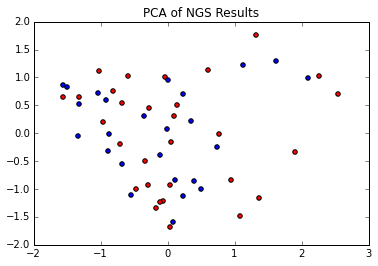

In [194]:
plt.figure()
for c, i in zip("rb", [0, 1]):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], c=c)
plt.legend()
plt.title('PCA of NGS Results')
plt.show()

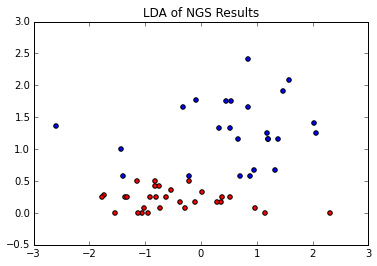

In [220]:
plt.figure()
plt.scatter(X_r2[y == 0, 0], B, c='r')
plt.scatter(X_r2[y == 1, 0], A, c='b')
plt.title('LDA of NGS Results')
plt.show()

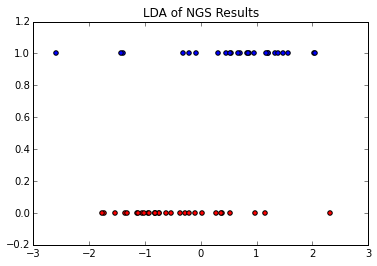

In [224]:
plt.figure()
plt.scatter(X_r2[y == 0, 0], y[y==0], c='r')
plt.scatter(X_r2[y == 1, 0], y[y==1], c='b')
plt.title('LDA of NGS Results')
plt.show()
plt.savefig('/Users/greg/Desktop/')